In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        import pandas as pd
test_result_data_balanced = pd.read_csv("results/test_result_data_withRVMC_RVMR_SVM_NaiveBayes_LSTM_KNN_Majority_based_voting_balanced.csv")
test_result_imbalanced = pd.read_csv("results/test_result_data_with_RVMC_RVMR_SVM_NaiveBayes_LSTM_KNN_Majority_based_voting_imbalanced.csv")

In [2]:
test_result_imbalanced.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0           0             0               0                 0   
1           1             1               1                 1   
2           2             2               2                 2   
3           3             3               3                 3   
4           4             4               4                 4   

   Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1  \
0                   0                     0                       0   
1                   1                     1                       1   
2                   2                     2                       2   
3                   3                     3                       3   
4                   4                     4                       4   

                                                text label  \
0           omg one thing anoth cat worm bad day end   ham   
1  argh spotti anyway thing rememb research provi...   ham   
2                                       way offic da   ham   
3                               thank chikku gud nyt   ham   
4  let ur heart ur compass ur mind ur map ur soul...   ham   

   naive_bayes_prediction  SVM prediction  LSTM prediction  RVM prediction  \
0                       0               0                0       -0.008504   
1                       0               0                0       -0.038518   
2                       0               0                0       -0.052808   
3                       0               0                0       -0.021862   
4                       0               0                0        0.036788   

   KNN prediction  Majority Based Voting prediction  RVMC prediction  
0               0                                 0                0  
1               0                                 0                0  
2               0                                 0                0  
3               0                                 0                0  
4               0                                 0                0

In [3]:
actual_labels_balanced = test_result_data_balanced['label'].tolist()
actual_labels_imbalanced = test_result_imbalanced['label'].tolist()

In [4]:
svm_prediction_labels_balanced = test_result_data_balanced['SVM prediction'].tolist()
naive_bayes_prediction_labels_balanced = test_result_data_balanced['naive_bayes_prediction'].tolist()
LSTM_predcition_labels_balanced = test_result_data_balanced['LSTM prediction'].tolist()
rvmr_prediction_labels_balanced = test_result_data_balanced['RVM prediction'].tolist()
knn_prediction_labels_balanced = test_result_data_balanced['KNN prediction'].tolist()
majority_based_voting_prediction_labels_balanced = test_result_data_balanced['Majority Based Voting prediction'].tolist()
rvmc_prediction_label_balanced = test_result_data_balanced['RVMC prediction'].tolist()

svm_prediction_labels_imbalanced = test_result_imbalanced['SVM prediction'].tolist()
naive_bayes_prediction_labels_imbalanced = test_result_imbalanced['naive_bayes_prediction'].tolist()
LSTM_predcition_labels_imbalanced = test_result_imbalanced['LSTM prediction'].tolist()
rvmr_prediction_labels_imbalanced = test_result_imbalanced['RVM prediction'].tolist()
knn_prediction_labels_imbalanced = test_result_imbalanced['KNN prediction'].tolist()
majority_based_voting_prediction_labels_imbalanced = test_result_imbalanced['Majority Based Voting prediction'].tolist()
rvmc_prediction_labels_imbalanced = test_result_imbalanced['RVMC prediction'].tolist()

In [5]:
binary_actual_labels_balanced = []
for label in actual_labels_balanced:
    if label == 'ham':
        binary_actual_labels_balanced.append(0)
    else:
        binary_actual_labels_balanced.append(1)


binary_actual_labels_imbalanced = []
for label in actual_labels_imbalanced:
    if label == 'ham':
        binary_actual_labels_imbalanced.append(0)
    else:
        binary_actual_labels_imbalanced.append(1)

In [6]:
rvmr_prediction_labels_imbalanced_corrected = []
for pred in rvmr_prediction_labels_imbalanced:
    if pred < 0.5:
        rvmr_prediction_labels_imbalanced_corrected.append(0)
    else:
        rvmr_prediction_labels_imbalanced_corrected.append(1)

In [7]:
from sklearn import metrics
majority_based_voting_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, majority_based_voting_prediction_labels_balanced) * 100
svm_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, svm_prediction_labels_balanced) * 100
nb_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, naive_bayes_prediction_labels_balanced) * 100
knn_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, knn_prediction_labels_balanced) * 100
rvmc_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, rvmc_prediction_label_balanced) * 100
rvmr_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, rvmr_prediction_labels_balanced) * 100
lstm_balanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_balanced, LSTM_predcition_labels_balanced) * 100


majority_based_voting_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, majority_based_voting_prediction_labels_imbalanced) * 100
svm_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, svm_prediction_labels_imbalanced) * 100
nb_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, naive_bayes_prediction_labels_imbalanced) * 100
knn_imaccuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, knn_prediction_labels_imbalanced) * 100
rvmc_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, rvmc_prediction_labels_imbalanced) * 100
rvmr_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, rvmr_prediction_labels_imbalanced_corrected) * 100
lstm_imbalanced_accuracy_score = metrics.accuracy_score(binary_actual_labels_imbalanced, LSTM_predcition_labels_imbalanced) * 100


In [8]:
rvmr_balanced_accuracy_score

96.8227424749164

import pickle
naive_bayes_loaded_model = pickle.load(open("models/Naive_Bayes_spam_classification_model", 'rb'))
svm_loaded_model = pickle.load(open("models/SVM_spam_classification_model", 'rb'))
rvm_loaded_model = pickle.load(open("models/RVM_spam_classification_model",'rb'))


In [9]:
majority_based_voting_balanced_accuracy_score

97.82608695652173

import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([90,100])
models = ['RVMR', 'SVM', 'Naive Bayes', 'LSTM','KNN'," Ensemble","RVMC"]
accuracy_scores = [rvm_accuracy_score,svm_accuracy_score,naive_bayes_accuracy_score,lstm_accuracy_score,knn_accuracy_score,majority_based_voting_score ]
axes.bar(models,accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Models Accuracy comparision on test data')
fig.savefig('results/models_accuracy_comparision.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()


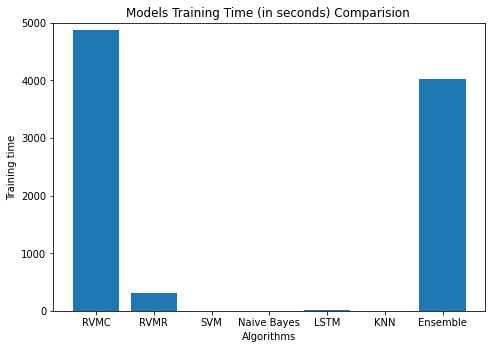

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([0,5000])
models = ['RVMC','RVMR', 'SVM', 'Naive Bayes', 'LSTM','KNN',"Ensemble"]
accuracy_scores = [4875.46746783746376,303.65796089172363,1.2404370307922363,0.00406336784362793,12.491737365722656,0.004248142242431641 ,4032.547657846574]
axes.bar(models,accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Training time')
plt.title('Models Training Time (in seconds) Comparision ')
fig.savefig('results/models_training_time_comparision.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()


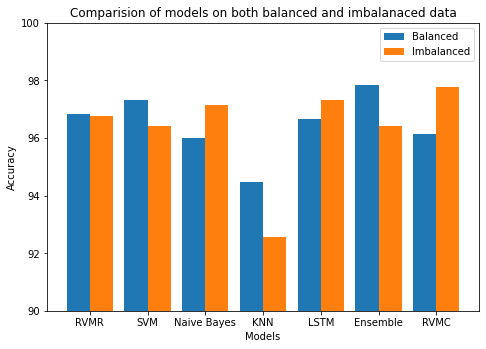

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# axes = plt.gca()
w = 0.4
# clear current figure
# plt.clf()
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
model_name = ["RVMR","SVM","Naive Bayes","KNN","LSTM","Ensemble","RVMC"]
balanced_accuracy = [rvmr_balanced_accuracy_score,svm_balanced_accuracy_score,nb_balanced_accuracy_score,knn_accuracy_score,lstm_balanced_accuracy_score,majority_based_voting_balanced_accuracy_score,rvmc_balanced_accuracy_score]
imbalanced_accuracy = [rvmr_imbalanced_accuracy_score,svm_imbalanced_accuracy_score,nb_imbalanced_accuracy_score,knn_imaccuracy_score,lstm_imbalanced_accuracy_score,majority_based_voting_imbalanced_accuracy_score,rvmc_imbalanced_accuracy_score]
bar1 = np.arange(len(model_name))
bar2 = [i + w for i in bar1]
plt.ylim([90,100])
plt.bar(bar1,balanced_accuracy,w,label= "Balanced")
plt.bar(bar2,imbalanced_accuracy,w,label = "Imbalanced")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparision of models on both balanced and imbalanaced data")
plt.xticks(bar1+w/2,model_name)
plt.legend()
plt.savefig('results/comparision_chart.png' ,bbox_inches='tight')
plt.show()

In [12]:
from sklearn.metrics import classification_report
ensemble_classification_report = classification_report(binary_actual_labels_balanced,majority_based_voting_prediction_labels_balanced)

In [13]:
from sklearn.metrics import precision_recall_fscore_support
svm_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, svm_prediction_labels_balanced, average='macro'))
rvmr_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, rvmr_prediction_labels_balanced, average='macro'))
naive_bayes_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, naive_bayes_prediction_labels_balanced, average='macro'))
lstm_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, LSTM_predcition_labels_balanced, average='macro'))
knn_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, knn_prediction_labels_balanced, average='macro'))
ensemble_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced, majority_based_voting_prediction_labels_balanced, average='macro'))
rvmc_prf_result_balanced = list(precision_recall_fscore_support(binary_actual_labels_balanced,rvmc_prediction_label_balanced,average='macro'))


svm_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, svm_prediction_labels_imbalanced, average='macro'))
rvmr_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, rvmr_prediction_labels_imbalanced_corrected, average='macro'))
naive_bayes_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, naive_bayes_prediction_labels_imbalanced, average='macro'))
lstm_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, LSTM_predcition_labels_imbalanced, average='macro'))
knn_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, knn_prediction_labels_imbalanced, average='macro'))
ensemble_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced, majority_based_voting_prediction_labels_imbalanced, average='macro'))
rvmc_prf_result_imbalanced = list(precision_recall_fscore_support(binary_actual_labels_imbalanced,rvmc_prediction_labels_imbalanced,average='macro'))


In [14]:
rvmr_prf_result_balanced

[0.9683153359816483, 0.9681738858063361, 0.9682202263910293, None]

In [15]:
svm_prf_result_balanced.append(svm_balanced_accuracy_score)
rvmr_prf_result_balanced .append(rvmr_balanced_accuracy_score)
naive_bayes_prf_result_balanced.append(nb_balanced_accuracy_score)
lstm_prf_result_balanced .append(lstm_balanced_accuracy_score)
knn_prf_result_balanced.append(knn_accuracy_score)
ensemble_prf_result_balanced.append(majority_based_voting_balanced_accuracy_score)
rvmc_prf_result_balanced.append(rvmc_balanced_accuracy_score)


svm_prf_result_imbalanced.append(svm_imbalanced_accuracy_score)
rvmr_prf_result_imbalanced .append(rvmr_imbalanced_accuracy_score)
naive_bayes_prf_result_imbalanced.append(svm_imbalanced_accuracy_score)
lstm_prf_result_imbalanced .append(lstm_imbalanced_accuracy_score)
knn_prf_result_imbalanced.append(knn_imaccuracy_score)
ensemble_prf_result_imbalanced.append(majority_based_voting_imbalanced_accuracy_score)
rvmc_prf_result_imbalanced.append(rvmc_imbalanced_accuracy_score)

In [16]:
rvmr_prf_result_balanced

[0.9683153359816483,
 0.9681738858063361,
 0.9682202263910293,
 None,
 96.8227424749164]

In [17]:
metrics = ["Precision","Recall","F-Score","NaN","Accuracy"]
prf_dataframe_balanced = pd.DataFrame({"metrics":metrics,"SVM":svm_prf_result_balanced, "RVMR":rvmr_prf_result_balanced,"Naive Bayes":naive_bayes_prf_result_balanced,"LSTM":lstm_prf_result_balanced,"KNN":knn_prf_result_balanced,"Ensemble":ensemble_prf_result_balanced,"RVMC":rvmc_prf_result_balanced})
prf_dataframe_imbalanced = pd.DataFrame({"metrics":metrics,"SVM":svm_prf_result_imbalanced, "RVMR":rvmr_prf_result_imbalanced,"Naive Bayes":naive_bayes_prf_result_imbalanced,"LSTM":lstm_prf_result_imbalanced,"KNN":knn_prf_result_imbalanced,"Ensemble":ensemble_prf_result_imbalanced,"RVMC":rvmc_prf_result_imbalanced})

In [18]:
prf_dataframe_balanced

metrics        SVM       RVMR  Naive Bayes       LSTM        KNN  \
0  Precision   0.973293   0.968315     0.960956   0.966552   0.950065   
1     Recall   0.973208   0.968174     0.960131   0.966552   0.944290   
2    F-Score   0.973239   0.968220     0.959855   0.966552   0.944604   
3        NaN        NaN        NaN          NaN        NaN        NaN   
4   Accuracy  97.324415  96.822742    95.986622  96.655518  94.481605   

    Ensemble       RVMC  
0   0.978469   0.961526  
1   0.978175   0.961551  
2   0.978254   0.961536  
3        NaN        NaN  
4  97.826087  96.153846

In [19]:
evaluation_metrics_table_balanced = prf_dataframe_balanced.dropna()
evaluation_metrics_table_imbalanced = prf_dataframe_imbalanced.dropna()

In [20]:
evaluation_metrics_table_balanced

metrics        SVM       RVMR  Naive Bayes       LSTM        KNN  \
0  Precision   0.973293   0.968315     0.960956   0.966552   0.950065   
1     Recall   0.973208   0.968174     0.960131   0.966552   0.944290   
2    F-Score   0.973239   0.968220     0.959855   0.966552   0.944604   
4   Accuracy  97.324415  96.822742    95.986622  96.655518  94.481605   

    Ensemble       RVMC  
0   0.978469   0.961526  
1   0.978175   0.961551  
2   0.978254   0.961536  
4  97.826087  96.153846

In [21]:
evaluation_metrics_table_imbalanced

metrics        SVM       RVMR  Naive Bayes       LSTM        KNN  \
0  Precision   0.979940   0.978309     0.959498   0.953489   0.960096   
1     Recall   0.873418   0.888718     0.919871   0.934126   0.737342   
2    F-Score   0.917301   0.926930     0.938377   0.943494   0.801107   
4   Accuracy  96.412556  96.771300    96.412556  97.309417  92.556054   

    Ensemble       RVMC  
0   0.979940   0.975035  
1   0.873418   0.931454  
2   0.917301   0.951721  
4  96.412556  97.757848